### Datos entreneamiento Shift

En este notebook vamos a aplicar el shift para las obtener las columnas mas correlacionadas.

- __Datos recibidos:__ obtenidos de notebook __1-datos_entrenamiento_shift.ipynb__
- __Responsable:__ Daniel Bustillos
- __Contacto:__  juandaniel.bucam@gmail.com

__Notas del proyecto__
Necesitamos generar un csv con los niveles máximos, mínimo y promedio por día, se perderá la información de la estación, también generaremos el atributo PM10mean y PM25mean que representarán los valores de las últimas 24 horas de los contaminantes.

calidad de caire
pronostico contaminación

## Pasos
[X] Aplicar Shift con Correlaciones <br>
[X] Sacar minimo promedio y maximo <br>
[X] Obtener columnas más correlacionadas<br><br>

In [1]:
contaminante = "O3"

In [2]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None 

In [3]:
data_hour_merge_24 = pd.read_csv("./datos_modelos_formateados.csv")

In [4]:
estaciones = data_hour_merge_24.id_station.unique().tolist()

In [5]:
data_est = {}
for elem in estaciones:
    data_est[elem] = data_hour_merge_24[data_hour_merge_24.id_station == elem]

In [6]:
data_hour_merge_24 = data_hour_merge_24.dropna(subset=[contaminante]).reset_index(drop=True)#PM25
data_hour_merge_24.head(5)

,CO,NO,NO2,NOX,O3,PM10,PM2.5,RH,SO2,TMP,...,WSP,dia,fecha,hora,id_station,mes,PM10mean,PM25mean,WSP_x,WSP_y
0,0.6,2.0,24.0,26.0,14.0,NaN,NaN,62.0,2.0,14.8,...,1.9,2.0,2016-01-02 00:00:00,0,AJM,1.0,NaN,NaN,1.663345,0.918304
1,NaN,NaN,NaN,NaN,16.0,NaN,3.0,92.0,NaN,8.5,...,1.3,2.0,2016-01-02 00:00:00,0,AJU,1.0,NaN,NaN,1.268310,0.285291
2,1.1,15.0,40.0,55.0,2.0,53.0,17.0,NaN,19.0,NaN,...,NaN,2.0,2016-01-02 00:00:00,0,CAM,1.0,NaN,NaN,NaN,NaN
3,0.9,3.0,39.0,42.0,11.0,NaN,19.0,NaN,NaN,NaN,...,NaN,2.0,2016-01-02 00:00:00,0,CCA,1.0,NaN,NaN,NaN,NaN
4,0.6,NaN,NaN,NaN,27.0,21.0,NaN,65.0,1.0,14.0,...,1.0,2.0,2016-01-02 00:00:00,0,CHO,1.0,NaN,NaN,-0.223741,-0.974649


# Leamos el archivo de correlaciones 

Este archivo se generó en el notebook: __/home/paw/DanielBustillos/contaminación/correlaciones_pau/correlaciones_función_paulina.ipynb__

In [7]:
target = "O3_y"
correlacion = "O3"
O3_corr = pd.read_csv("./correlaciones/"+correlacion +"_max_corr.csv")
#O3_corr = O3_corr.iloc[:,1:]

In [8]:
O3_corr.valor.min()

-0.7114494343957481

Vamos a quedarnos con las variables con corr>0.3:

- Para PM10 (O3_corr.valor > 0.6 o  O3_corr.valor < -0.6)
- Para O3 (O3_corr.valor > 0.44 o  O3_corr.valor < -0.44)

In [9]:
O3_corr_filtro = O3_corr[(O3_corr.valor > 0.4) | (O3_corr.valor < -0.4) ].reset_index(drop=True)

In [10]:
O3_corr_filtro.shape

(144, 3)

Vamos a aplicar el shift para cada elemento de la tabla __O3_corr__:

In [11]:
def shit_corr(df):
    for i in range(len(O3_corr_filtro)):
        name_column = str( O3_corr_filtro.loc[i,"contaminante"] + "_" + str( O3_corr_filtro.loc[i,"horas"] ) ) 
        df[name_column] = df[O3_corr_filtro.loc[i,"contaminante"]].shift(int(float(str(O3_corr_filtro.loc[i,"horas"]))) ) 
    return df.dropna()

Aplicamos esta función para cada DF de cada estación:

In [12]:
data_shift = {}
for elem in data_est:
    data_shift[elem] = shit_corr(data_est[elem])

In [13]:
df_append = pd.DataFrame(columns = data_est["MER"].columns.tolist())

In [14]:
for key in data_est:
    df_append = df_append.append(data_est[key], ignore_index=True,sort=True)

In [15]:
df_append.tail(10)

,CO,CO_30.0,CO_31.0,CO_6.0,CO_7.0,CO_8.0,NO,NO2,NOX,NOX_10.0,...,hora_57.0,hora_58.0,hora_59.0,hora_66.0,hora_67.0,hora_68.0,hora_69.0,hora_9.0,id_station,mes
886041,0.2,0.3,0.4,0.4,0.3,0.2,0.0,9.0,8.0,14.0,...,5.0,4.0,3.0,20.0,19.0,18.0,17.0,5.0,SAC,6.0
886042,0.1,0.3,0.3,0.4,0.4,0.3,0.0,7.0,7.0,16.0,...,6.0,5.0,4.0,21.0,20.0,19.0,18.0,6.0,SAC,6.0
886043,0.1,0.3,0.3,0.4,0.4,0.4,0.0,7.0,7.0,18.0,...,7.0,6.0,5.0,22.0,21.0,20.0,19.0,7.0,SAC,6.0
886044,0.1,0.2,0.3,0.4,0.4,0.4,0.0,9.0,9.0,29.0,...,8.0,7.0,6.0,23.0,22.0,21.0,20.0,8.0,SAC,6.0
886045,0.3,0.1,0.2,0.3,0.4,0.4,1.0,14.0,15.0,28.0,...,9.0,8.0,7.0,0.0,23.0,22.0,21.0,9.0,SAC,6.0
886046,0.3,0.1,0.1,0.3,0.3,0.4,1.0,21.0,21.0,30.0,...,10.0,9.0,8.0,1.0,0.0,23.0,22.0,10.0,SAC,6.0
886047,0.3,0.1,0.1,0.2,0.3,0.3,0.0,20.0,20.0,31.0,...,11.0,10.0,9.0,2.0,1.0,0.0,23.0,11.0,SAC,6.0
886048,0.3,0.0,0.1,0.1,0.2,0.3,0.0,19.0,19.0,24.0,...,12.0,11.0,10.0,3.0,2.0,1.0,0.0,12.0,SAC,6.0
886049,0.4,0.1,0.0,0.1,0.1,0.2,0.0,27.0,28.0,15.0,...,13.0,12.0,11.0,4.0,3.0,2.0,1.0,13.0,SAC,6.0
886050,0.3,0.1,0.1,0.1,0.1,0.1,0.0,24.0,24.0,12.0,...,14.0,13.0,12.0,5.0,4.0,3.0,2.0,14.0,SAC,6.0


## Groupbys

In [16]:
cols = df_append.columns.tolist()

In [17]:
cols.remove("fecha")

Finalmente, aplicamos los groupbys:

In [18]:
data_hour_merge_24_mean = df_append.groupby('fecha')[cols].mean()
data_hour_merge_24_mean.reset_index(inplace=True)

In [19]:
data_hour_merge_24_max = df_append.groupby('fecha')[cols].max()
data_hour_merge_24_max.reset_index(inplace=True)

In [20]:
data_hour_merge_24_min = df_append.groupby('fecha')[cols].min()
data_hour_merge_24_min.reset_index(inplace=True)

## Cambiamos los nombres:

In [21]:
max_columns = data_hour_merge_24_max.columns.tolist()
min_columns = data_hour_merge_24_min.columns.tolist()
mean_columns = data_hour_merge_24_mean.columns.tolist()

In [22]:
for i in range(len(max_columns)):
    if max_columns[i] not in ['fecha','hora','dia','mes','id_station']:
        max_columns[i] = max_columns[i]+"_max"
        min_columns[i] = min_columns[i]+"_min"    
        mean_columns[i] = mean_columns[i]+"_mean"

In [23]:
data_hour_merge_24_mean.columns = mean_columns
data_hour_merge_24_min.columns = min_columns
data_hour_merge_24_max.columns = max_columns

##### Unamos los df's de manera que tengamos en una solo los datos promedio, máximo y minimo por día:

In [24]:
data_hour_merge = pd.merge(data_hour_merge_24_mean, data_hour_merge_24_max, on=['fecha'])
data_hour_merge = pd.merge(data_hour_merge, data_hour_merge_24_min, on=['fecha'])

guardamos el archivo:

In [25]:
contaminante ="O3"

quitar _outliers

In [26]:
data_hour_merge.to_csv("./datos_gb_" + contaminante + ".csv", sep=',', encoding='utf-8',index=False)

In [27]:
print("listo")

listo


# Leamos el archivo:

In [28]:
data_hour_merge = pd.read_csv("./datos_gb_" + contaminante + ".csv", sep=',', encoding='utf-8')

In [29]:
data_hour_merge = data_hour_merge.sort_values(['fecha',"hora_x"], ascending=[0,1]).reset_index(drop=True)

## Correlacionados con el target.

Ahora vamos a sacar los atributos más correlacionado con el target, el target es la columna a pronosticar, por simplicidad solo vamos a sacar la correlación con target a las 12 horas:

Generemos los target de pronóstico:

Generemos el shift de 1 a 24 horas, ahora hacia adelante

In [30]:
if contaminante == 'PM10' or contaminante == 'PM2.5':
    item = contaminante+"mean_max"
else:
    item = contaminante+"_max" 
print(item)

O3_max


#### definimos el 'PM10mean_y_frcst_24'

Desplazamos el target 24 horas en le futuro este será nuesto item a pronosticar.

In [31]:
data_hour_merge[str(item+"_frcst_"+str(24))] = data_hour_merge[item].shift(24)

In [32]:
target = str(item+"_frcst_"+ str(24))
print(target)

O3_max_frcst_24


Saquemos la correlación:

In [33]:
data_corr = data_hour_merge.corr()

Guardamos los atributos mas correlacionados en una lista:

- 0.47 para PM10
- 0.4 para O3

In [37]:
variables_mas_correlacionadas_pm10_mean = data_corr[target][(data_corr[target] > 0.44) |                                                                
                                                            (data_corr[target] < -0.44)].index.tolist()

In [38]:
len(variables_mas_correlacionadas_pm10_mean)

183

In [39]:
variables_mas_correlacionadas_pm10_mean.append("RH_mean")
variables_mas_correlacionadas_pm10_mean.append("WSP_mean")
variables_mas_correlacionadas_pm10_mean.append("TMP_mean")
variables_mas_correlacionadas_pm10_mean = list(set(variables_mas_correlacionadas_pm10_mean))

Guardemos estas variables, no pueden cambiarse una vez que los modelos estan entrenados:

In [40]:
variables_mas_correlacionadas_pm10_mean.append("fecha")

Filtremos el DF con las variables mas correlacionadas:

In [41]:
data_hour_merge = data_hour_merge[variables_mas_correlacionadas_pm10_mean]

### Hacemos el desplazamiento de los atributos a con los que tenemos el pronóstico:

In [42]:
lista_frcst = ["RH_mean","WSP_mean","TMP_mean"]

In [43]:
for item_pronostico in lista_frcst:
    for i in range(1, 25):
        col_name = str(item_pronostico+"_frcst_"+str(i))
        data_hour_merge[col_name] = data_hour_merge[item_pronostico].shift(i)
data_hour_merge.dropna(inplace=True)

volvamosa sacar la correlación y filtramos los valores de correlación:

In [44]:
data_corr_2 = data_hour_merge.corr()

variables_mas_correlacionadas_con_pronóstico = data_corr_2[target][(data_corr_2[target] > 0.44) |                                                                
                                                            (data_corr_2[target] < -0.44)].index.tolist()

In [45]:
len(variables_mas_correlacionadas_con_pronóstico)

203

In [46]:
variables_mas_correlacionadas_con_pronóstico.append("fecha")

In [47]:
data_hour_merge = data_hour_merge[variables_mas_correlacionadas_con_pronóstico]

### Hacemos el desplazamiento de los atributos a pronosticar:

In [48]:
for i in range(1, 24):
    col_name = str(item+"_frcst_"+str(i))
    data_hour_merge[col_name] = data_hour_merge[item].shift(i)
    if i==range(1, 24)[-1]:
        print(i)
data_hour_merge.dropna(inplace=True)

23


Guardemos:

In [49]:
data_hour_merge.to_csv("./datos_modelos_"+ contaminante + ".csv",sep=',', encoding='utf-8',index=False)

In [50]:
data_hour_merge.shape

(29458, 227)

In [51]:
data_hour_merge['fecha'] =  pd.to_datetime(data_hour_merge['fecha'], format='%Y-%m-%d %H:%M')

import matplotlib.pyplot as plt

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca()

# df_export.(50).plot(x="fecha", y=[ "O3_y"],ax=ax,label=["O3 Medido"],color="dodgerblue")
# df_export.(60).head(100).plot(x="fecha", y=["O3_y_frcst_6"],ax=ax,label=["Pronóstico O3 a 12 horas"],color='darkblue',dashes=[6, 2])

data_hour_merge.tail(200).plot(x="fecha", y=["O3_0.0_max"],ax=ax,label=["PM10mean ahora"],color="saddlebrown")
data_hour_merge.tail(200).plot(x="fecha", y=["O3_max_frcst_20"],ax=ax,label=["PM10 pronostico 12"],color="blue")
data_hour_merge.tail(200).plot(x="fecha", y=["O3_22.0_max"],ax=ax,label=["PM10 a pasado"],color='maroon',dashes=[6, 2])

plt.ylabel("PM10[mg/m3]")
plt.title("Comparación del Modelo")


# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.01)
ax.grid(which='major', alpha=0.3)



plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

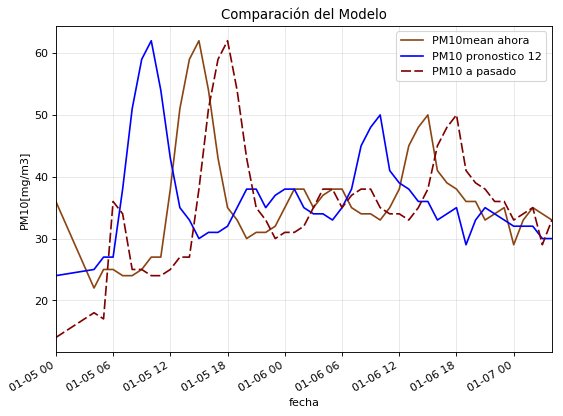

In [52]:
data_hour_merge['fecha'] =  pd.to_datetime(data_hour_merge['fecha'], format='%Y-%m-%d %H:%M')

import matplotlib.pyplot as plt

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca()

# df_export.(50).plot(x="fecha", y=[ "O3_y"],ax=ax,label=["O3 Medido"],color="dodgerblue")
# df_export.(60).head(100).plot(x="fecha", y=["O3_y_frcst_6"],ax=ax,label=["Pronóstico O3 a 12 horas"],color='darkblue',dashes=[6, 2])

data_hour_merge.tail(50).plot(x="fecha", y=["O3_0.0_max"],ax=ax,label=["PM10mean ahora"],color="saddlebrown")
data_hour_merge.tail(50).plot(x="fecha", y=["O3_max_frcst_5"],ax=ax,label=["PM10 pronostico 12"],color="blue")
data_hour_merge.tail(50).plot(x="fecha", y=["O3_3.0_max"],ax=ax,label=["PM10 a pasado"],color='maroon',dashes=[6, 2])

plt.ylabel("PM10[mg/m3]")
plt.title("Comparación del Modelo")


# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.01)
ax.grid(which='major', alpha=0.3)



plt.legend()
plt.show()